In [13]:
import pandas as pd # library to manipulate dataframes
import numpy as np # for matrices, arrays, matrix calculation
import warnings 
import math
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler   # sklearn- ML pkg/lib
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

%matplotlib inline 
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
# package (folder) --> module - can have submodules (.py file) --> methods/functions 

In [15]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [16]:
data = pd.read_csv('smoke_detection_iot.csv')
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [17]:
data.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [18]:
type(data.columns)

pandas.core.indexes.base.Index

In [19]:
list(data.columns)

['Unnamed: 0',
 'UTC',
 'Temperature[C]',
 'Humidity[%]',
 'TVOC[ppb]',
 'eCO2[ppm]',
 'Raw H2',
 'Raw Ethanol',
 'Pressure[hPa]',
 'PM1.0',
 'PM2.5',
 'NC0.5',
 'NC1.0',
 'NC2.5',
 'CNT',
 'Fire Alarm']

In [20]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [21]:
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [22]:
data.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [23]:
data.shape

(62630, 15)

In [24]:
type(data.shape)  #list[] -> mutable, dict{key: value} -> mutable, tuple() -> immutable, sets -> immutable : 4 kinds of datasets

tuple

In [27]:
rows = data.shape[0]
columns = data.shape[1]

print(rows)
print(columns)

62630
15


In [28]:
# checking the data types of the columns 
# Check if we need to correct the datatypes inferred by python by default 

In [29]:
data.dtypes

UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object

In [30]:
# based on the data description file , data types for all the columns except CNT are correct 
# column CNT might behave as a categorical variable 

In [31]:
data['CNT'].value_counts()

0        5
866      5
774      5
773      5
772      5
        ..
12158    2
12157    2
12156    2
12155    2
24993    2
Name: CNT, Length: 24994, dtype: int64

In [47]:
data = data.drop(['new_F_temp'], axis = 1)

In [48]:
data['F_temp'] = (data['Temperature[C]'] *(9/5)) + 32

In [49]:
data.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm', 'F_temp'],
      dtype='object')

In [50]:
data['F_temp']


0        68.0000
1        68.0270
2        68.0522
3        68.0792
4        68.1062
          ...   
62625    65.1884
62626    65.5754
62627    65.9606
62628    66.3494
62629    66.7382
Name: F_temp, Length: 62630, dtype: float64

In [52]:
type(data['F_temp'])

pandas.core.series.Series

In [53]:
data['CNT'].nunique()

24994

In [56]:
data['CNT'].value_counts()

0        5
866      5
774      5
773      5
772      5
        ..
12158    2
12157    2
12156    2
12155    2
24993    2
Name: CNT, Length: 24994, dtype: int64

In [54]:
# based on the number of unique values in the column, we are going to use it as a numerical column

In [58]:
data.isna().sum() # Chaining, execution left to right

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
F_temp            0
dtype: int64

In [59]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,F_temp
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626,60.746762
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596,25.847237
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.618000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000,51.789650
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000,68.234000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000,77.737100
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000,139.874000


In [60]:
# checking for data imbalance 

In [61]:
data['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [62]:
data['Fire Alarm'].nunique()

2

In [63]:
data['Fire Alarm'].unique()

array([0, 1], dtype=int64)

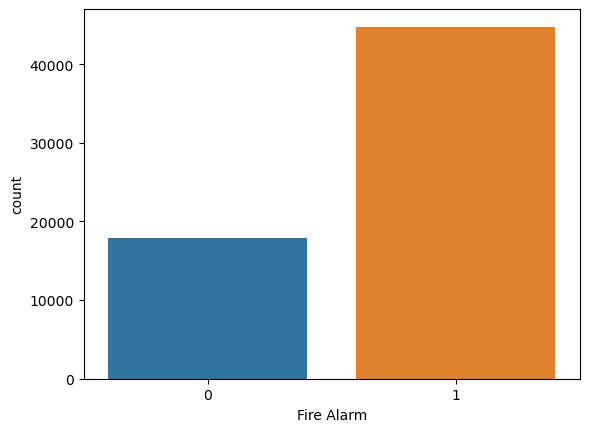

In [64]:
sns.countplot(data['Fire Alarm'])
plt.show()

In [ ]:
# Imbalance = Number of records in the dataset with target as 1 vs number of records with target 0
# we are going to use oversampling technique to balance the dataset before we apply the classification models
# We will balance the data after some more EDA (exploratory data analysis) and data cleaning 

In [ ]:
# This imbalance can cause the model to be biased towards predicting one class (majority class) over the other 

In [65]:
features = data.drop(['Fire Alarm'], axis=1)

In [ ]:
# Checking distribution of each column

Distribution plot for :  UTC


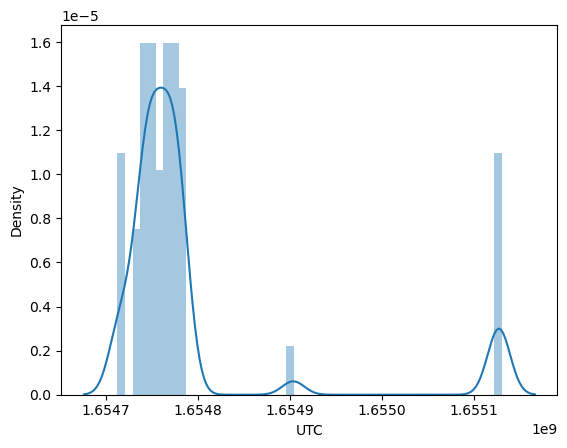

Distribution plot for :  Temperature[C]


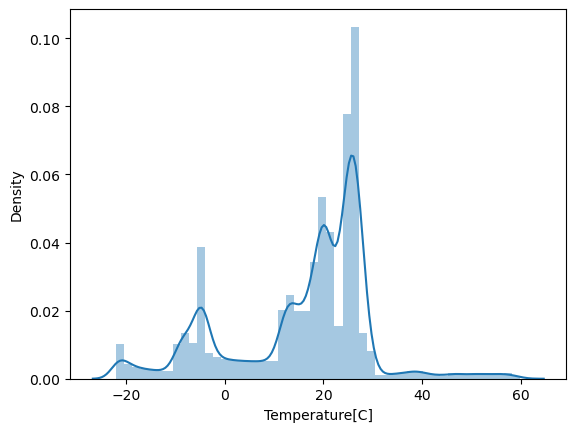

Distribution plot for :  Humidity[%]


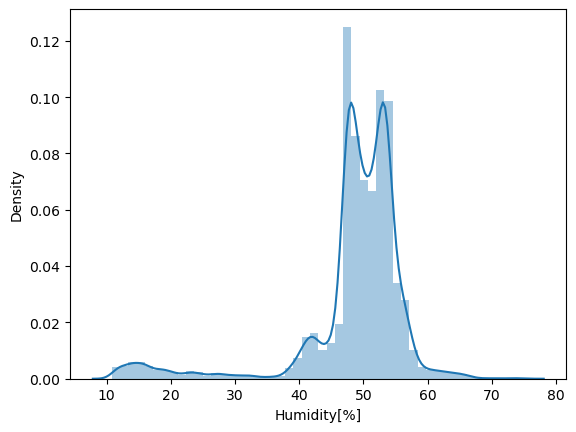

Distribution plot for :  TVOC[ppb]


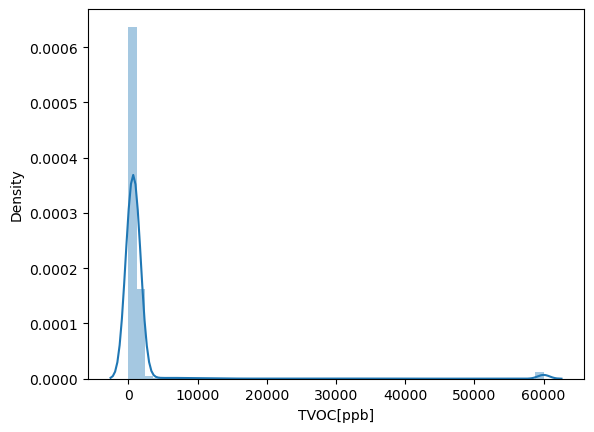

Distribution plot for :  eCO2[ppm]


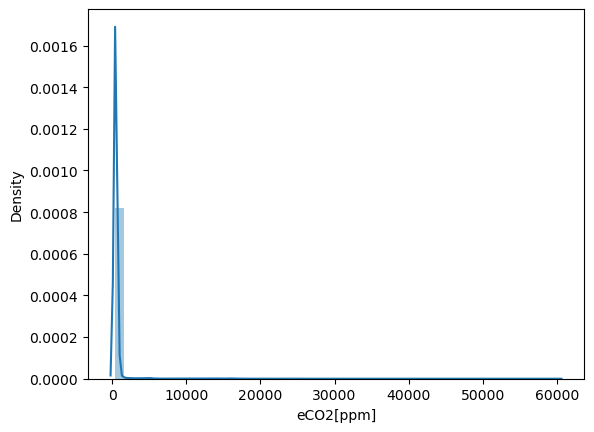

Distribution plot for :  Raw H2


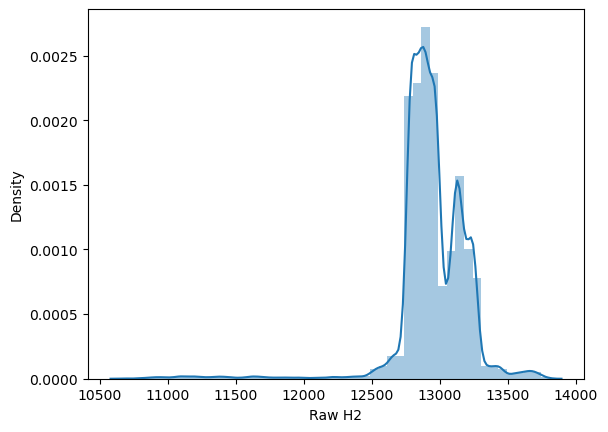

Distribution plot for :  Raw Ethanol


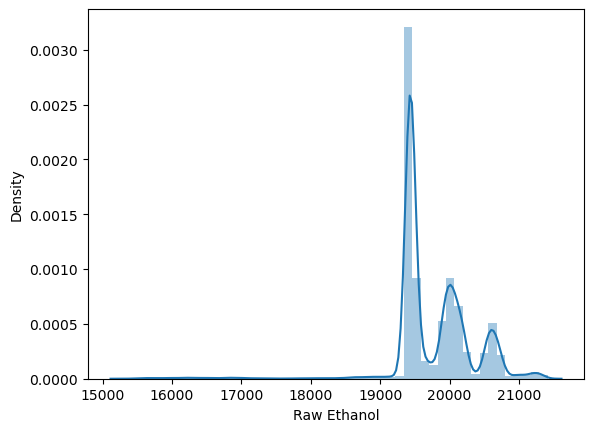

Distribution plot for :  Pressure[hPa]


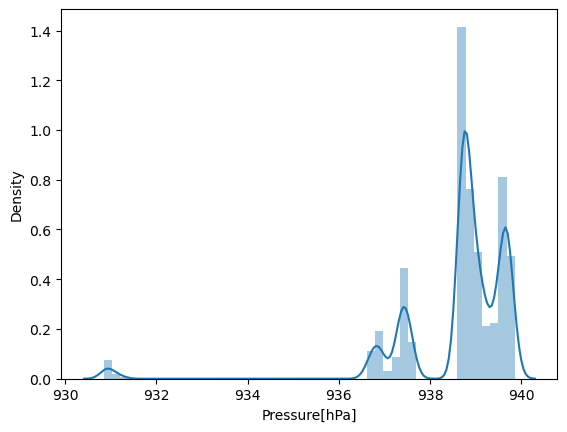

Distribution plot for :  PM1.0


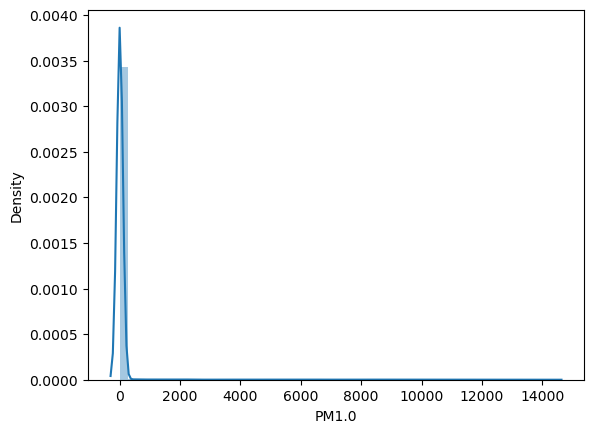

Distribution plot for :  PM2.5


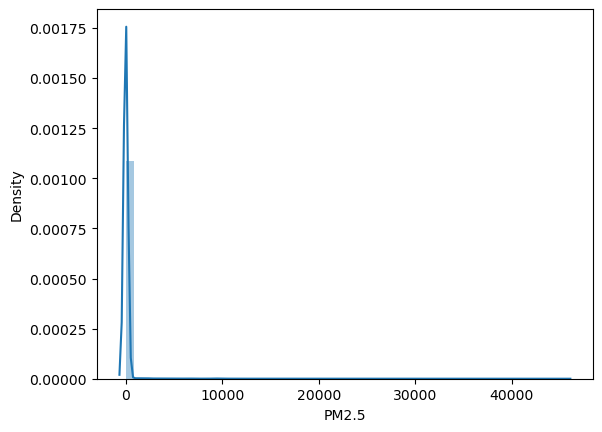

Distribution plot for :  NC0.5


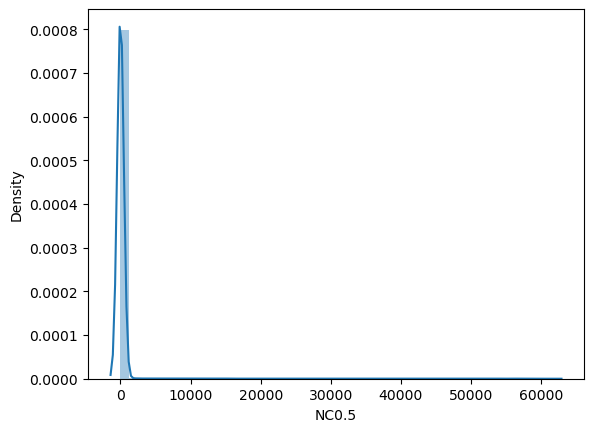

Distribution plot for :  NC1.0


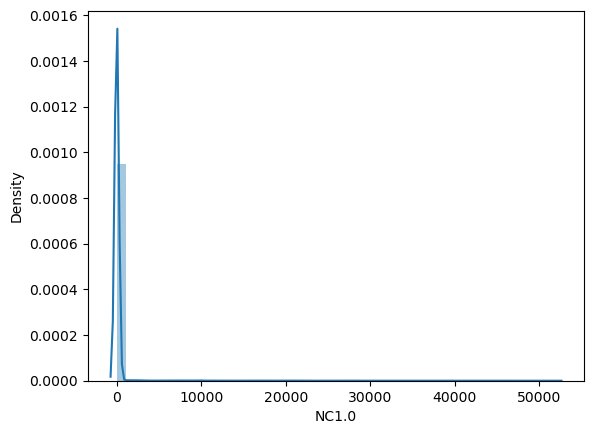

Distribution plot for :  NC2.5


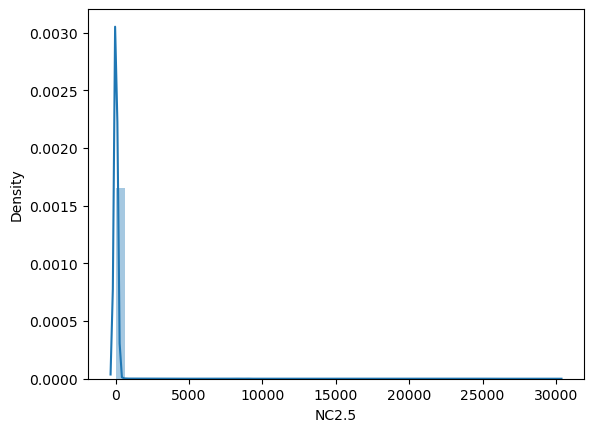

Distribution plot for :  CNT


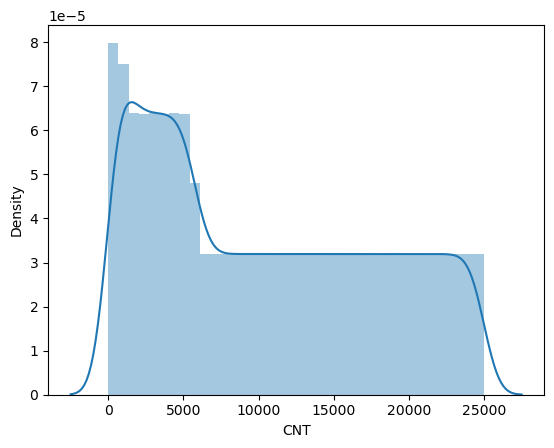

Distribution plot for :  F_temp


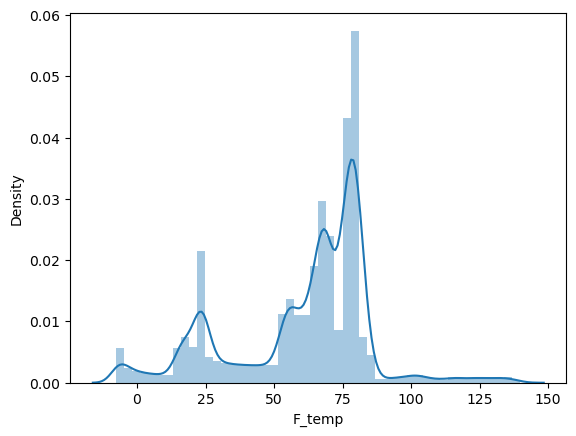

In [66]:
for col in features.columns:
    print('Distribution plot for : ', col)
    sns.distplot(features[col])   
    plt.show()
    
    # checking distribution plot - for models like Logistic regression, KNN, linear regression 
    #it is imp to check if the features are independent of each other and normally distributed     
    
    # normality of residuals(errors)
    
    #In the plots below, we have multiple modes (peaks and valleys - crest and troughs) and skewness (left and right) 

In [67]:
# data for some of the columns is not normally distributed. We are going to apply some transformations to bring it closer
# to a normal distribution

# There are outliers in some columns as well , that we will remove as well

In [68]:
# Column UTC

<AxesSubplot:xlabel='UTC'>

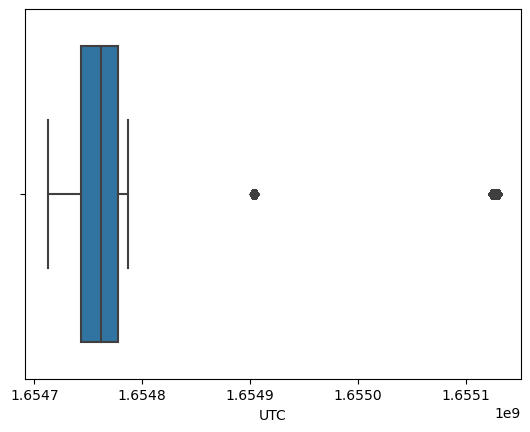

In [70]:
sns.boxplot(data['UTC']) # boxplot or box-whisker plots

In [71]:
# Checking how many data points we would lose if we remove the outliers 

In [73]:
iqr = np.percentile(data['UTC'], 75) - np.percentile(data['UTC'], 25)
upper_limit = np.percentile(data['UTC'], 75) + 1.5*iqr
lower_limit = np.percentile(data['UTC'], 25) - 1.5*iqr
outliers = data[(data['UTC']>upper_limit )]
len(outliers)

6898

In [74]:
# simce we would lose a lot of data , we will not remove these outliers from this column

<AxesSubplot:xlabel='Pressure[hPa]', ylabel='Density'>

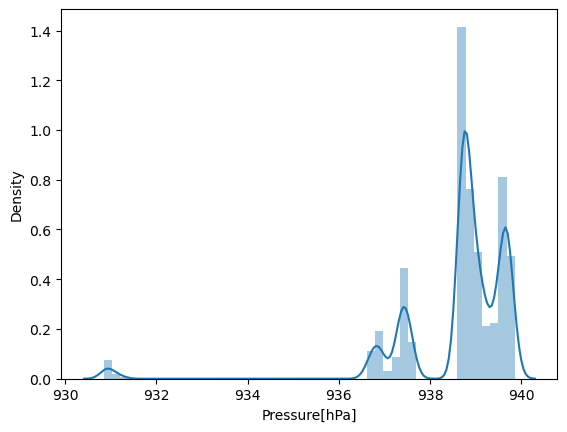

In [75]:
sns.distplot(data['Pressure[hPa]'])

<AxesSubplot:xlabel='Pressure[hPa]'>

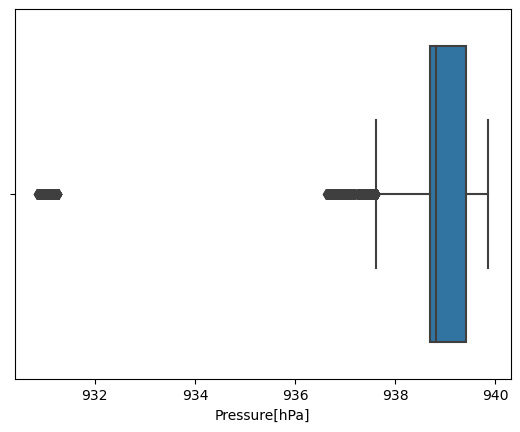

In [76]:
sns.boxplot(data['Pressure[hPa]'])

In [77]:
# this column has outliers 

In [78]:
iqr = np.percentile(data['Pressure[hPa]'], 75) - np.percentile(data['Pressure[hPa]'], 25)
upper_limit = np.percentile(data['Pressure[hPa]'], 75) + 1.5*iqr
lower_limit = np.percentile(data['Pressure[hPa]'], 25) - 1.5*iqr
outliers = data[(data['Pressure[hPa]']>upper_limit )| (data['Pressure[hPa]']<lower_limit)]
len(outliers)

12632

In [ ]:
# We will adjust the limits to ensure that we do not lose too many data points 

In [79]:
iqr = np.percentile(data['Pressure[hPa]'], 75) - np.percentile(data['Pressure[hPa]'], 25)
upper_limit = np.percentile(data['Pressure[hPa]'], 75) + 1.5*iqr
lower_limit = np.percentile(data['Pressure[hPa]'], 25) - 3*iqr
outliers = data[(data['Pressure[hPa]']>upper_limit )| (data['Pressure[hPa]']<lower_limit)]
len(outliers)

1154

In [ ]:
# We will remove these records from the data

In [80]:
data.shape

(62630, 16)

In [81]:
data = data[(data['Pressure[hPa]']>lower_limit)&(data['Pressure[hPa]']<upper_limit)]
data.shape

(61476, 16)

In [85]:
data = data.reset_index(drop=True)

In [ ]:
# no other column had outliers 

In [83]:
data.shape

(61476, 16)

In [86]:
# taking a sample of data for creating pairplots
# since it was taking too long to run the code 
data_sampled = data.sample(frac=0.1)  #REMOVE it; (learn about pairplot**)

In [87]:
# sns.pairplot(data_sampled) #REMOVE it

In [ ]:
# Correlation Coefficient - Learn about it**
# one of the simple pearson's correlation coeff (mathematically denoted by rho symbol p)
# Value is between 1 to -1
# +ve correlation (directly prop) or -ve correlation (inversely prop)
# more magnitude -> stronger corr
# imp since-> features should be independent of each other - no corr should be there.
# done using heatmap

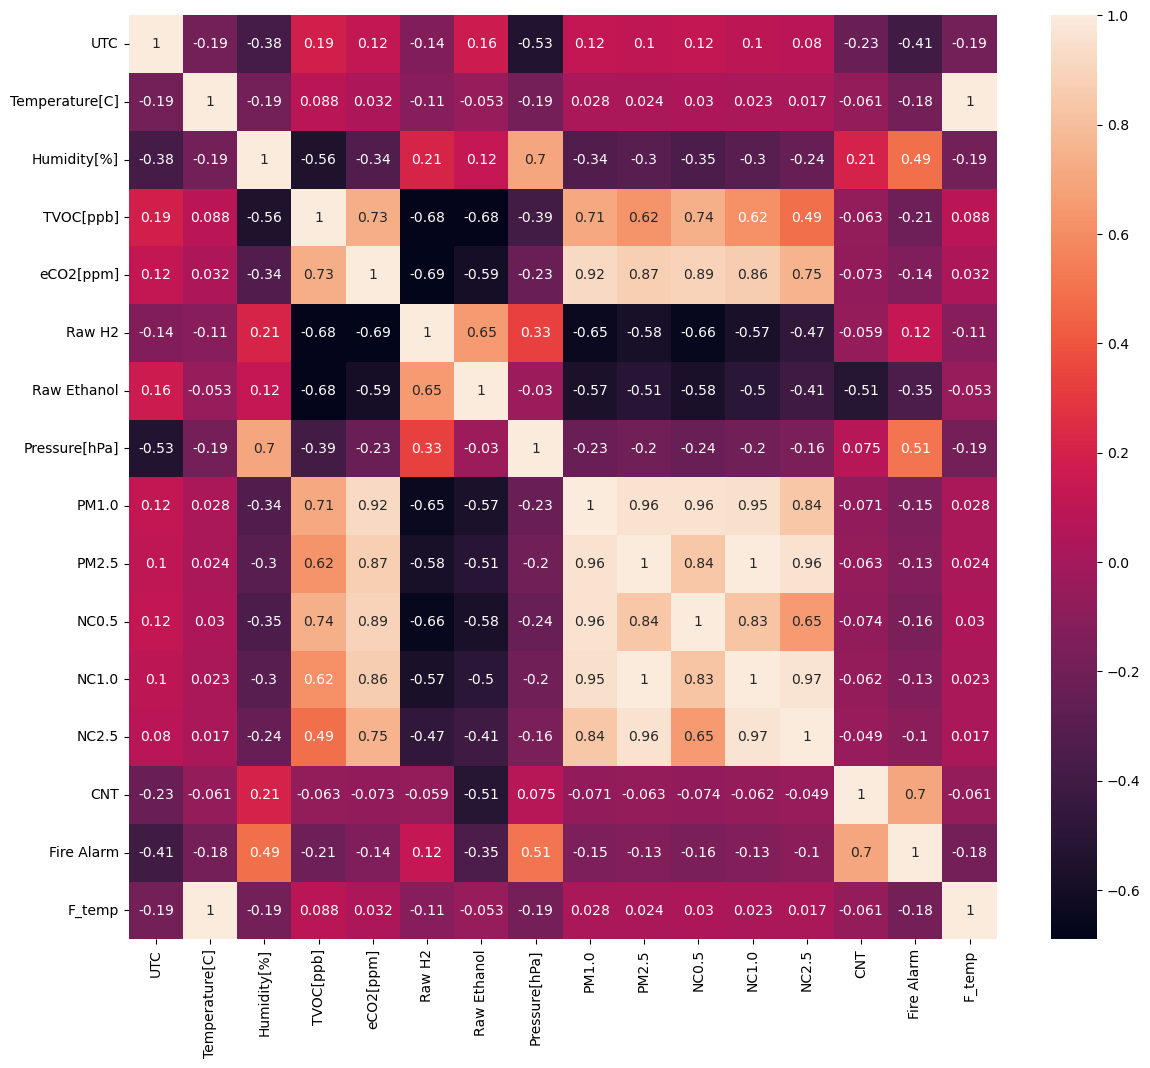

In [88]:
correlation = data.corr()
plt.figure(figsize = (14, 12))
sns.heatmap(correlation, annot = True)
plt.show()

In [89]:
# There are some columns that have extremely high correlation 
# columnms PM2.5 and NC1.0 have correlation of 1 
# Columns PM1.0 has high correlation with PM2.5 and NC1.0
# NC1.0 and NC2.5 have an extremely high correlation

In [90]:
# we wiil drop column PM2.5 and NC1.0

In [91]:
data = data.drop(['PM2.5', 'NC1.0'], axis = 1)

In [92]:
data.shape

(61476, 14)

Column: UTC


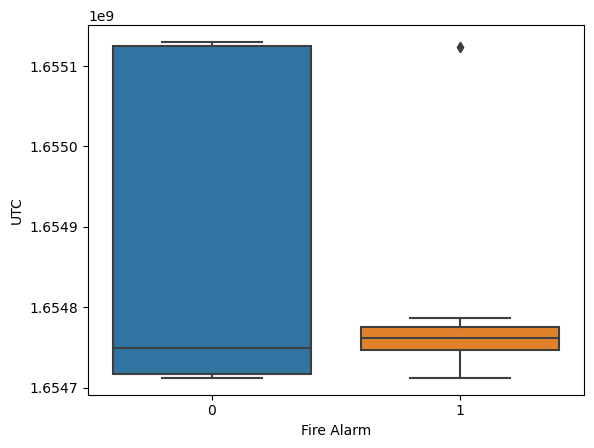

Column: Temperature[C]


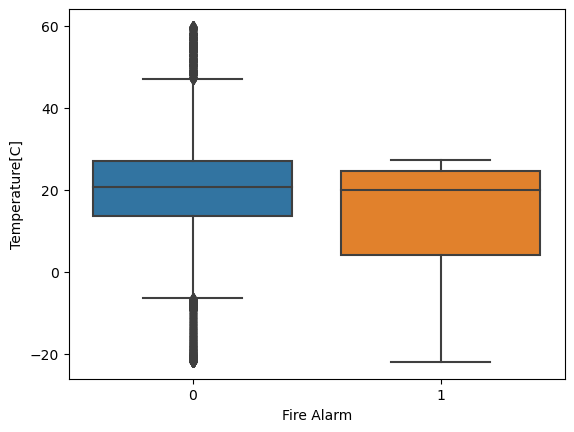

Column: Humidity[%]


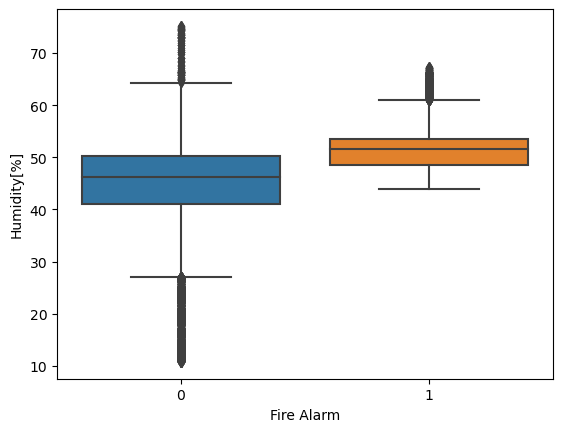

Column: TVOC[ppb]


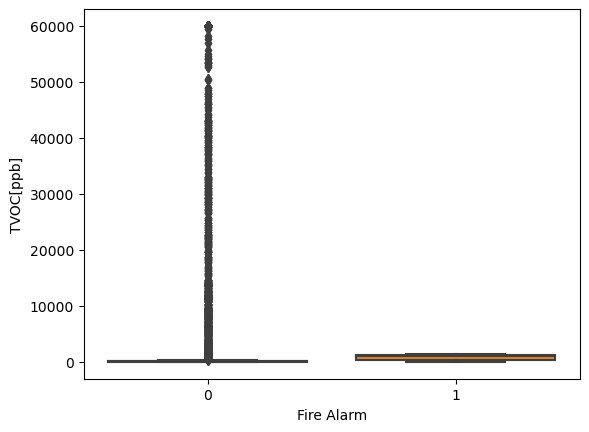

Column: eCO2[ppm]


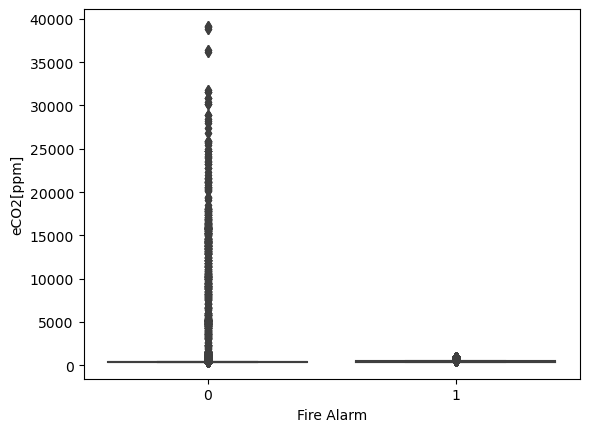

Column: Raw H2


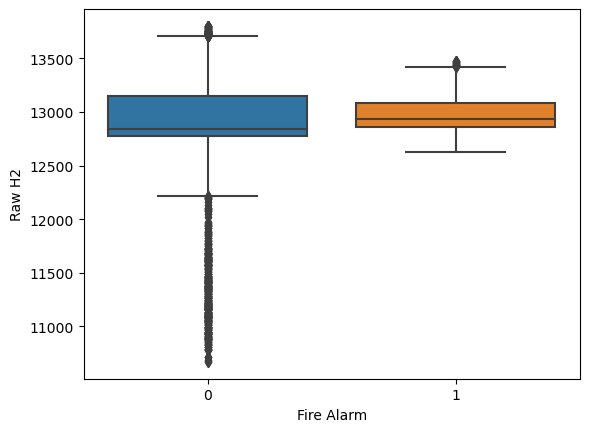

Column: Raw Ethanol


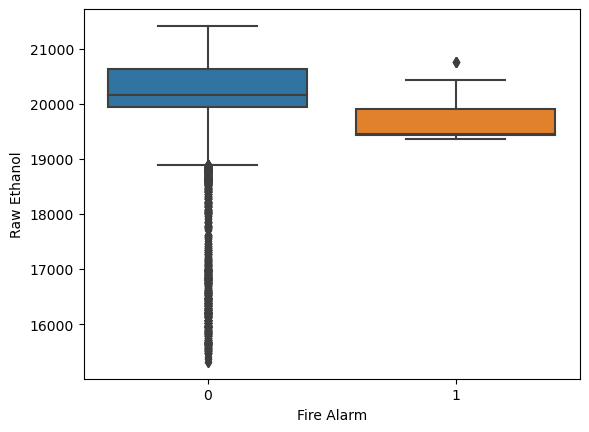

Column: Pressure[hPa]


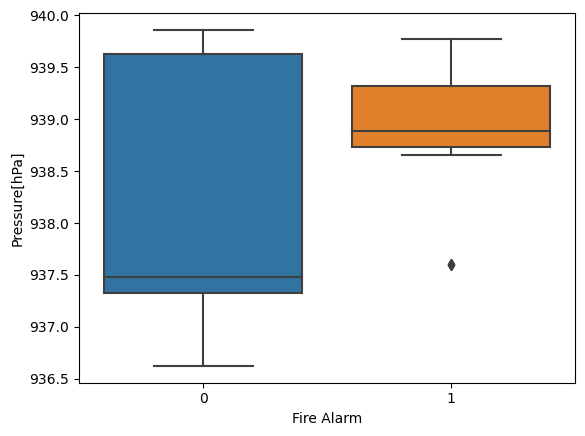

Column: PM1.0


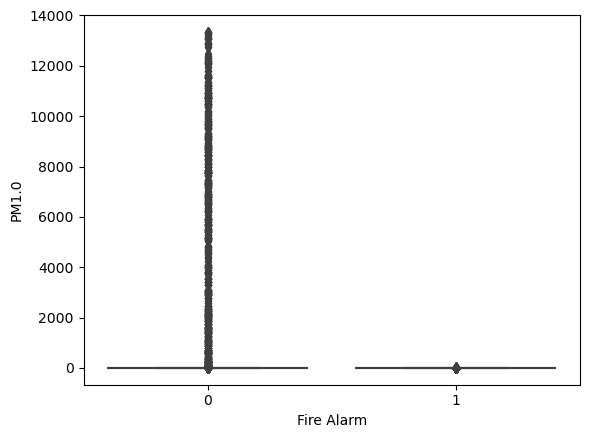

Column: NC0.5


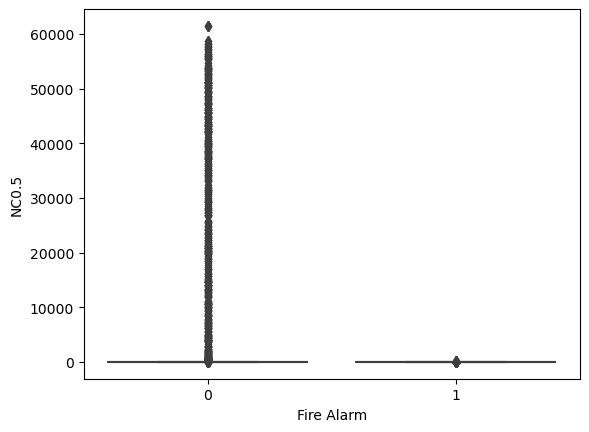

Column: NC2.5


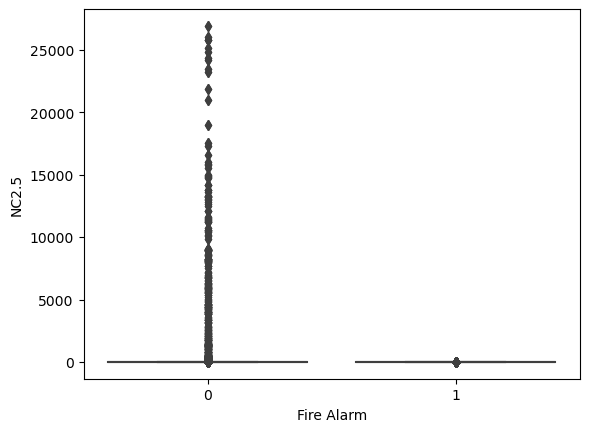

Column: CNT


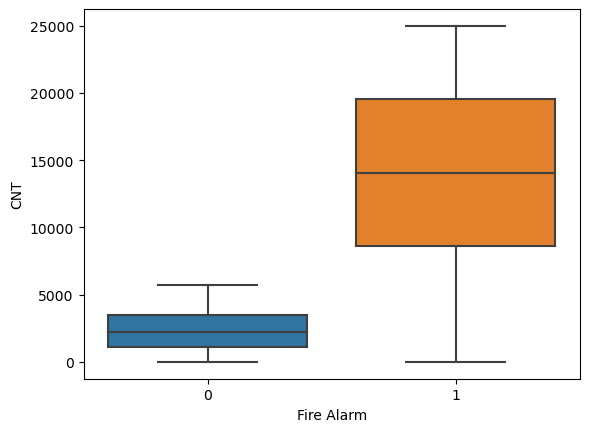

Column: F_temp


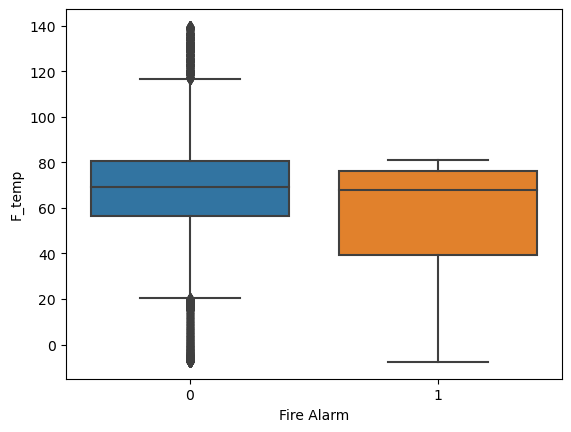

In [93]:
for col in data.columns:
    if col != 'Fire Alarm':
        print('Column:', col)
        sns.boxplot(x = data['Fire Alarm'], y = data[col])
        plt.show()

In [94]:
# from the box plot of UTC vs Fire Alarm, we can see that there are outliers when Fire_Alarm has the value 1

In [95]:
utc_fire_alarm_0 = data[data['Fire Alarm'] == 0]
utc_fire_alarm_0.shape

(17840, 14)

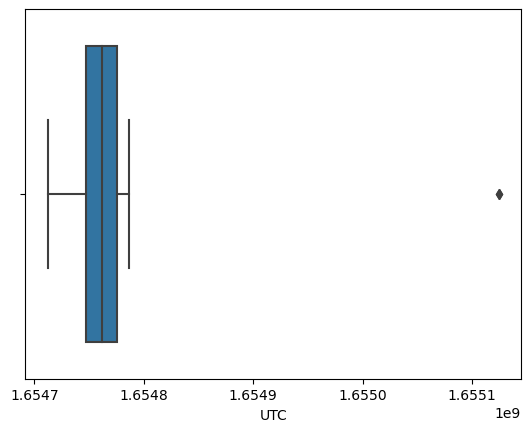

In [96]:
utc_fire_alarm_1 = data[data['Fire Alarm'] == 1]
sns.boxplot(utc_fire_alarm_1['UTC'])
plt.show()

In [97]:
utc_fire_alarm_1.shape

(43636, 14)

In [98]:
iqr = np.percentile(utc_fire_alarm_1['UTC'], 75) - np.percentile(utc_fire_alarm_1['UTC'], 25)
upper_limit = np.percentile(utc_fire_alarm_1['UTC'], 75) + 1.5*iqr
lower_limit = np.percentile(utc_fire_alarm_1['UTC'], 25) - 1.5*iqr
outliers = utc_fire_alarm_1[(utc_fire_alarm_1['UTC']>upper_limit )| (utc_fire_alarm_1['UTC']<lower_limit)]
len(outliers)

2

In [99]:
utc_fire_alarm_1_no_outliers = utc_fire_alarm_1[(utc_fire_alarm_1['UTC']> lower_limit)& (utc_fire_alarm_1['UTC']<upper_limit)]

In [100]:
utc_fire_alarm_1_no_outliers.shape

(43634, 14)

In [102]:
data = pd.concat([utc_fire_alarm_0, utc_fire_alarm_1_no_outliers], axis = 0).reset_index(drop=True).sample(frac=1)

In [103]:
data = data.reset_index(drop=True)

In [104]:
data.shape

(61474, 14)

In [105]:
# Using a similar process for the column 'Raw Ethanol'

In [106]:
raw_ethanol_fire_alarm_0 = data[data['Fire Alarm'] == 0]
raw_ethanol_fire_alarm_0.shape

(17840, 14)

In [107]:
raw_ethanol_fire_alarm_1= data[data['Fire Alarm'] == 1]
raw_ethanol_fire_alarm_1.shape

(43634, 14)

In [108]:
# Checking for the number of outliers 
iqr = np.percentile(raw_ethanol_fire_alarm_1['Raw Ethanol'], 75) - np.percentile(raw_ethanol_fire_alarm_1['Raw Ethanol'], 25)
upper_limit = np.percentile(raw_ethanol_fire_alarm_1['Raw Ethanol'], 75) + 1.5*iqr
lower_limit = np.percentile(raw_ethanol_fire_alarm_1['Raw Ethanol'], 25) - 1.5*iqr
outliers = raw_ethanol_fire_alarm_1[(raw_ethanol_fire_alarm_1['Raw Ethanol']>upper_limit )| (raw_ethanol_fire_alarm_1['Raw Ethanol']<lower_limit)]
len(outliers)

2

In [109]:
raw_ethanol_fire_alarm_1 = raw_ethanol_fire_alarm_1[(raw_ethanol_fire_alarm_1['Raw Ethanol']> lower_limit)& (raw_ethanol_fire_alarm_1['Raw Ethanol']<upper_limit)]

In [110]:
data = pd.concat([raw_ethanol_fire_alarm_0, raw_ethanol_fire_alarm_1], axis = 0).reset_index(drop=True).sample(frac=1)

In [111]:
data.shape

(61472, 14)

In [ ]:
# This is our clean dataset

In [113]:
data = data.reset_index(drop=True)

In [114]:
data.to_csv('clean_data_smoke_detection.csv')